In [58]:
import numpy as np
import pandas as pd


import seaborn as sns
%matplotlib inline

In [5]:
# load drinks dataset from csv files:
drinks = pd.read_csv('../datasets/drinks.csv')
drinks.shape

# show first 10 rows from drinks dataframe uing the head method:
drinks.head(10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [8]:
# TODO: make example with read_json()...
# # load json dataset from json files:
# es = pd.read_json('../datasets/ES.json')
# es.shape

# # show first 10 rows from drinks dataframe uing the head method:
# # es.head(10)

In [10]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [11]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [19]:
# show rows with NaN values:
nan_mask = drinks.continent.isnull()

drinks[nan_mask].head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN


In [22]:
# show only country names without continent values
drinks.country[nan_mask].head(3)

5     Antigua & Barbuda
11              Bahamas
14             Barbados
Name: country, dtype: object

In [28]:
# get the maximum wine_servings value:
# drinks.describe()
max_wine = drinks.wine_servings.max()
max_wine

max_wine_mask = drinks.wine_servings == max_wine

drinks.country[max_wine_mask]


61    France
Name: country, dtype: object

In [32]:
# get the maximum beer_servings value:

max_beer = drinks.beer_servings.max()
drinks[drinks.beer_servings == max_beer]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF


In [34]:
# get the maximum spirit_servings value:

max_spirit = drinks.spirit_servings.max()
drinks[drinks.spirit_servings == max_spirit]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,NaN


In [62]:
## get the maximum spirit_servings in EU:
drinks.groupby(by='continent').spirit_servings.max().EU
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


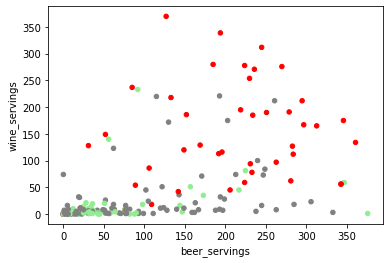

In [54]:
# scatterplot of beer servings versus wine servings (colors more of 1 condition)

# lets make a colors array, which will hold different color values for countries we are interested.
# for the rest - the default color will be 'gray'
colors = np.full_like(drinks.country, 'gray')

# assign red color for the EU countries:
colors[np.nonzero(drinks.continent=="EU")] = "red"
# assign lightgreen color for the AF countries:
colors[np.nonzero(drinks.continent=="AF")] = "lightgreen"

drinks.plot.scatter(x='beer_servings', y='wine_servings',color=colors)


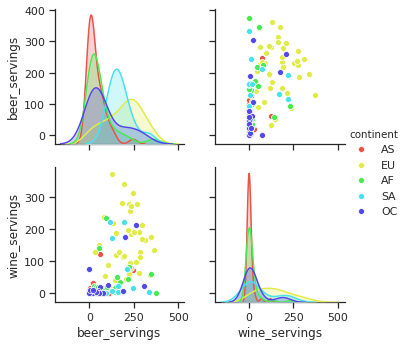

In [64]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(drinks, 
                 hue = 'continent',
                 vars=['beer_servings',
                       'wine_servings',                       
                      ],
                 palette=sns.hls_palette(6, l=.6, s=.8),
                 )

In [70]:
# list only countries which name startswith 'a'
for country in drinks.country:
    if country[0].lower() == 'a':
        print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan


In [81]:
# print the row with Bulgaria:
drinks[ drinks.country == 'Bulgaria'].wine_servings

# print the wine-servings in Bulgaria:
bul_wine_servings = drinks[ drinks.country == 'Bulgaria'].wine_servings
print(bul_wine_servings)

25    94
Name: wine_servings, dtype: int64


In [ ]:
# which countries drinks more wine than Bulgaria

